In [293]:
import numpy as np
G = 1
d = 3
T = 100
eta_theory = (1/G)*np.sqrt(np.log(d)/T)
eta_theory

0.1048147073968205

# Part 2

In [297]:
from importlib import reload
import rockPaperScissors
reload(rockPaperScissors)
from rockPaperScissors import *

In [298]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

import sys
import os

from rockPaperScissors import *

## Question 2

### Item B

In [280]:
player = EWAPlayer()
adversary = OptimalAdversary()
game = RPSFullInformation(player, adversary)

T = 100
for i in range(T):
    game.play()

player_loss = np.array( game.playerLoss )
player_distribution = np.array( game.pHistory )

p: [0.33333333 0.33333333 0.33333333]

[0 1 2]
j: 0
p: [0.24472847 0.66524096 0.09003057]

[2]
j: 2
p: [0.66524096 0.24472847 0.09003057]

[1]
j: 1
p: [0.33333333 0.33333333 0.33333333]

[2]
j: 2
p: [0.66524096 0.09003057 0.24472847]

[1]
j: 1
p: [0.24472847 0.09003057 0.66524096]

[0]
j: 0
p: [0.33333333 0.33333333 0.33333333]

[2]
j: 2
p: [0.66524096 0.09003057 0.24472847]

[1]
j: 1
p: [0.24472847 0.09003057 0.66524096]

[0]
j: 0
p: [0.33333333 0.33333333 0.33333333]

[2]
j: 2
p: [0.66524096 0.09003057 0.24472847]

[1]
j: 1
p: [0.24472847 0.09003057 0.66524096]

[0]
j: 0
p: [0.33333333 0.33333333 0.33333333]

[2]
j: 2
p: [0.66524096 0.09003057 0.24472847]

[1]
j: 1
p: [0.24472847 0.09003057 0.66524096]

[0]
j: 0
p: [0.33333333 0.33333333 0.33333333]

[2]
j: 2
p: [0.66524096 0.09003057 0.24472847]

[1]
j: 1
p: [0.24472847 0.09003057 0.66524096]

[0]
j: 0
p: [0.33333333 0.33333333 0.33333333]

[2]
j: 2
p: [0.66524096 0.09003057 0.24472847]

[1]
j: 1
p: [0.24472847 0.09003057 0.66524096

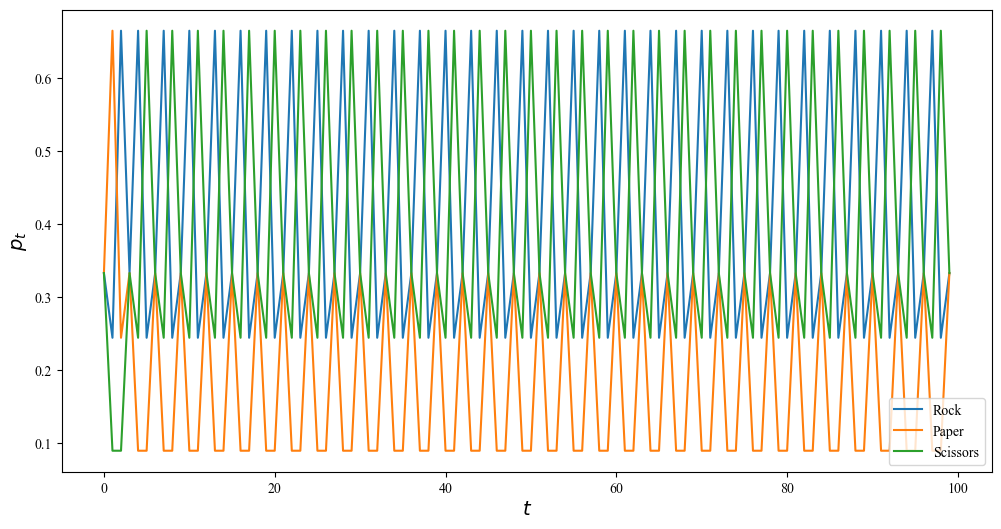

In [281]:
path = "./local/figs/"
figname = "part2question2b"

plt.figure( figsize=(12,6) )
plt.plot( player_distribution[:,0], label="Rock")
plt.plot( player_distribution[:,1], label="Paper")
plt.plot( player_distribution[:,2], label="Scissors")
plt.legend()
plt.xlabel(r"$t$", fontsize=14)
plt.ylabel(r"$p_t$", fontsize=14)
plt.savefig( path + figname + ".png", dpi=300, bbox_inches='tight' )
plt.show()

### Item C

In [282]:
p_cumsum = np.cumsum( player_distribution, axis=0 )
p_bar = p_cumsum / np.arange(1,T+1)[:,None]

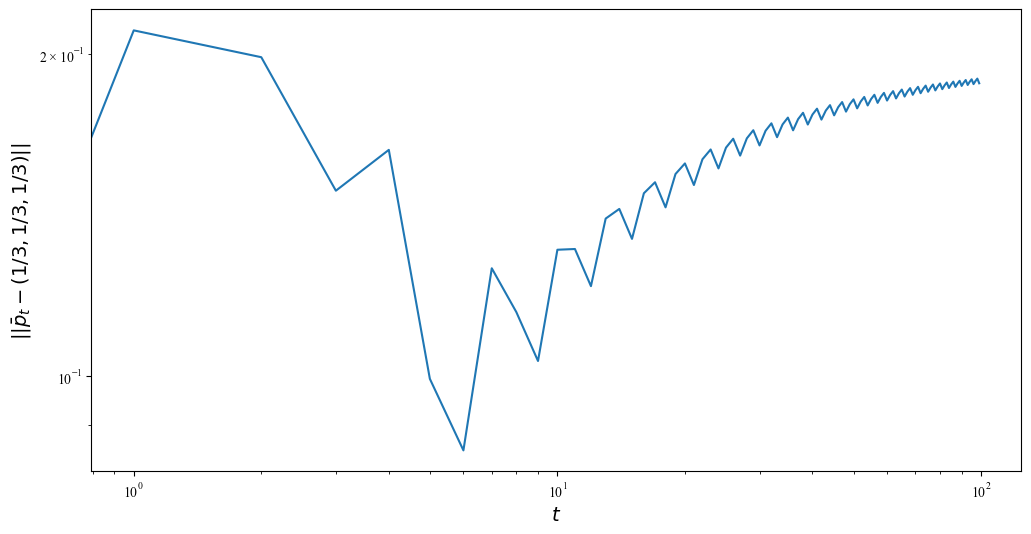

In [283]:
path = "./local/figs/"
figname = "part2question2c"

plt.figure( figsize=(12,6) )
plt.loglog( np.linalg.norm( p_bar - np.array( [1/3,1/3,1/3] ), axis=1 ) )
plt.xlabel(r"$t$", fontsize=14)
plt.ylabel(r"$|| \bar p_t - (1/3, 1/3, 1/3) ||$", fontsize=14)
plt.savefig( path + figname + ".png", dpi=300, bbox_inches='tight' )
plt.show()

In [289]:
p_bar[-1]

array([0.41362324, 0.18005259, 0.40632416])

In [290]:
avg_p = p_bar[-1]
argmax = np.flatnonzero( avg_p[-1] == avg_p[-1].max() )
loss = 0
for advarsary_a in argmax:
    loss += 1/len(argmax) * avg_p[(advarsary_a-1)%3]
loss

0.40632416138221955

### Item D

In [286]:
loss_cumsum = np.cumsum( player_loss )
loss_avg = loss_cumsum / np.arange(1,T+1)

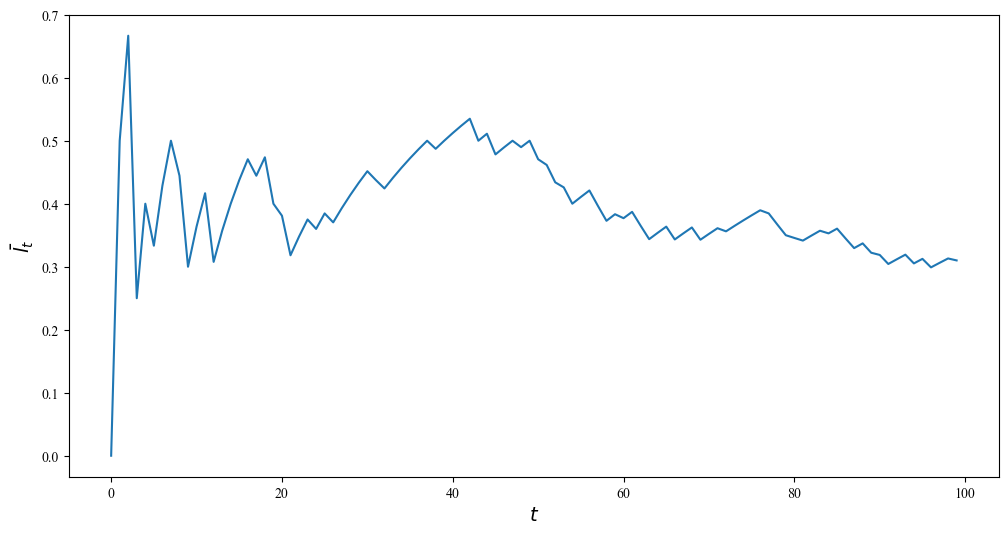

In [287]:
path = "./local/figs/"
figname = "part2question2d"

plt.figure( figsize=(12,6) )
plt.plot( loss_avg )
plt.xlabel(r"$t$", fontsize=14)
plt.ylabel(r"$\bar{l_t}$", fontsize=14)
plt.savefig( path + figname + ".png", dpi=300, bbox_inches='tight' )
plt.show()

In [288]:
print(loss_avg[-1])

0.31


### Item E

In [159]:
eta_list = [0.01, 0.05, 0.1, 0.5, 1]

In [160]:
player_loss_eta = []
player_distribution_eta = []

for eta in eta_list:

    player = EWAPlayer(eta=eta)
    adversary = OptimalAdversary()
    game = RPSFullInformation(player, adversary)

    T = 100
    for i in range(T):
        game.play()

    player_loss_eta.append( np.array( game.playerLoss ) )
    player_distribution_eta.append( np.array( game.pHistory ) )

In [161]:
player_loss_avg_eta = []

for i in range(len(eta_list)):
    loss_cumsum = np.cumsum( player_loss_eta[i] )
    loss_avg = loss_cumsum / np.arange(1,T+1)
    player_loss_avg_eta.append( loss_avg )

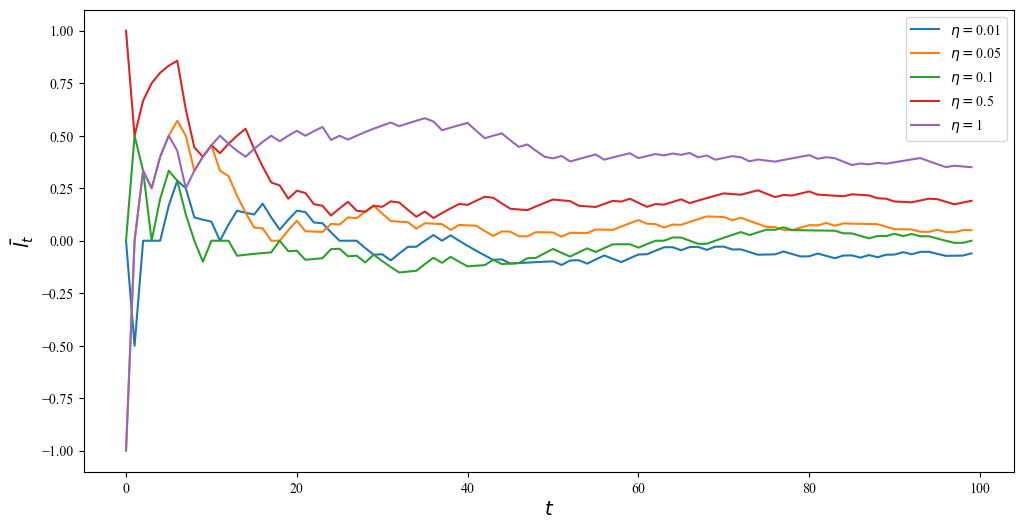

In [162]:
path = "./local/figs/"
figname = "part2question2e"

plt.figure( figsize=(12,6) )
for eta, loss_avg in zip(eta_list, player_loss_avg_eta):
    plt.plot( loss_avg, label=r"$\eta = $" + str(eta))
plt.legend()
plt.xlabel(r"$t$", fontsize=14)
plt.ylabel(r"$\bar{l_t}$", fontsize=14)
plt.savefig( path + figname + ".png", dpi=300, bbox_inches='tight' )
plt.show()

## Questions 3 and 4

In [303]:
player = EXP3Player()
adversary = EXP3Player()
game = RPSBandit(player, adversary)

T = 100
for i in range(T):
    game.play()

player_loss = np.array( game.playerLoss )
player_distribution = np.array( game.pHistory )
adversary_loss = np.array( game.adversaryLoss )
adversary_distribution = np.array( game.qHistory )

### 2.b

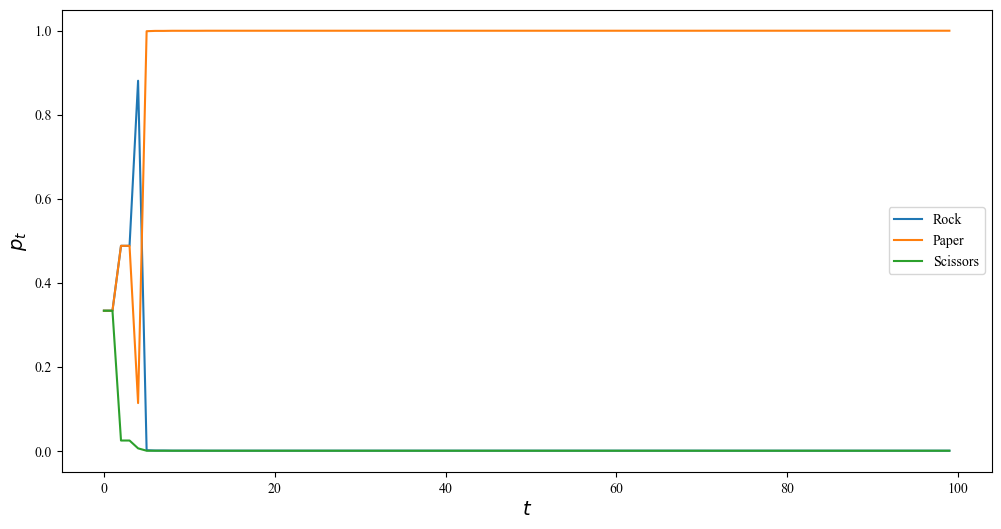

In [304]:
path = "./local/figs/"
figname = "part2question4b"

plt.figure( figsize=(12,6) )
plt.plot( player_distribution[:,0], label="Rock")
plt.plot( player_distribution[:,1], label="Paper")
plt.plot( player_distribution[:,2], label="Scissors")
plt.legend()
plt.xlabel(r"$t$", fontsize=14)
plt.ylabel(r"$p_t$", fontsize=14)
plt.savefig( path + figname + ".png", dpi=300, bbox_inches='tight' )
plt.show()

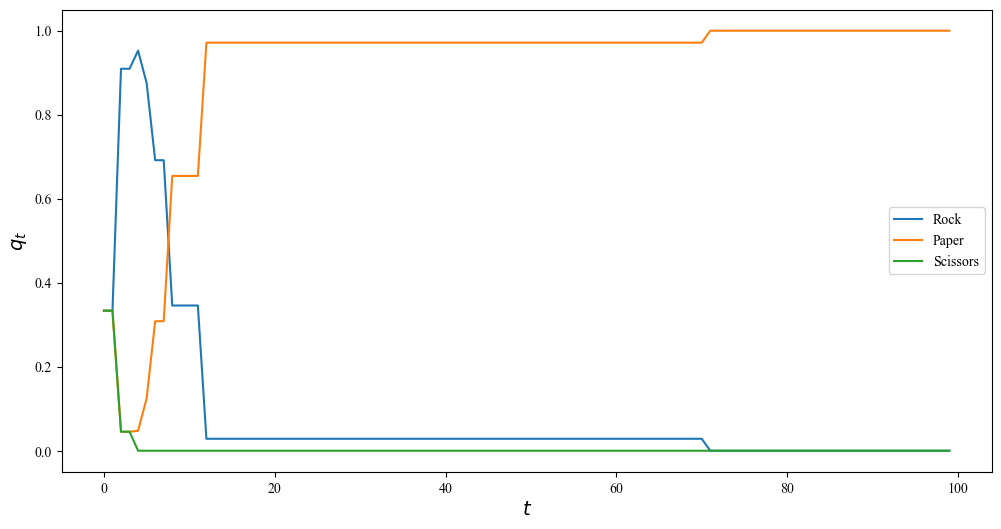

In [305]:
path = "./local/figs/"
figname = "part2question4b_adversary"

plt.figure( figsize=(12,6) )
plt.plot( adversary_distribution[:,0], label="Rock")
plt.plot( adversary_distribution[:,1], label="Paper")
plt.plot( adversary_distribution[:,2], label="Scissors")
plt.legend()
plt.xlabel(r"$t$", fontsize=14)
plt.ylabel(r"$q_t$", fontsize=14)
plt.savefig( path + figname + ".png", dpi=300, bbox_inches='tight' )
plt.show()

### 2.c

In [306]:
p_cumsum = np.cumsum( player_distribution, axis=0 )
p_bar = p_cumsum / np.arange(1,T+1)[:,None]

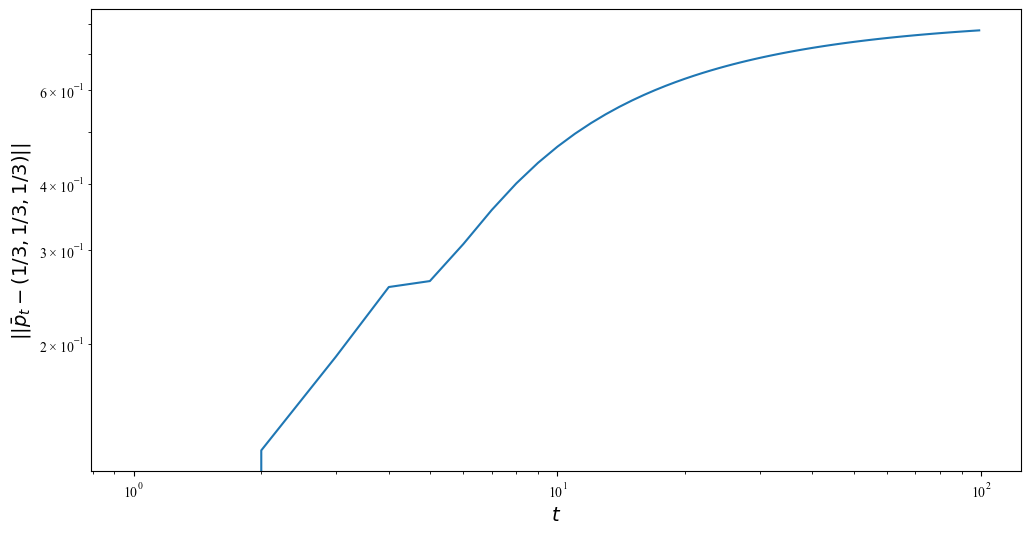

In [307]:
path = "./local/figs/"
figname = "part2question4c"

plt.figure( figsize=(12,6) )
plt.loglog( np.linalg.norm( p_bar - np.array( [1/3,1/3,1/3] ), axis=1 ) )
plt.xlabel(r"$t$", fontsize=14)
plt.ylabel(r"$|| \bar p_t - (1/3, 1/3, 1/3) ||$", fontsize=14)
plt.savefig( path + figname + ".png", dpi=300, bbox_inches='tight' )
plt.show()

### 2.d

In [308]:
loss_cumsum = np.cumsum( player_loss )
loss_avg = loss_cumsum / np.arange(1,T+1)

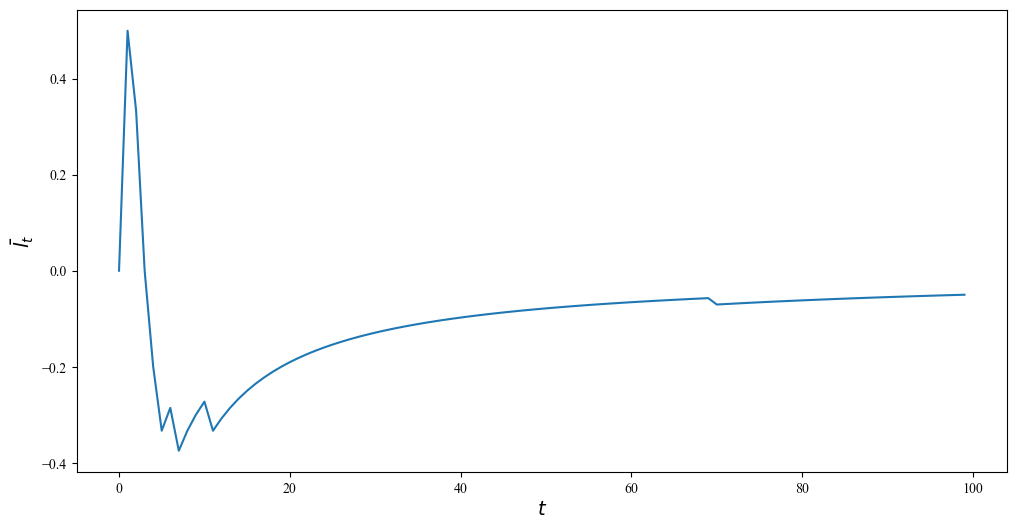

In [309]:
path = "./local/figs/"
figname = "part2question4d"

plt.figure( figsize=(12,6) )
plt.plot( loss_avg )
plt.xlabel(r"$t$", fontsize=14)
plt.ylabel(r"$\bar{l_t}$", fontsize=14)
plt.savefig( path + figname + ".png", dpi=300, bbox_inches='tight' )
plt.show()